In [2]:
!pip install pandas


In [3]:
import pandas as pd


In [4]:
#creation of the data frame
data = {
    'Method': ['A', 'B', 'C', 'D', 'E'],
    'TP': [100, 80, 25, 50, 0],
    'FP': [900, 125, 25, 50, 0],
    'FN': [0, 20, 75, 50, 100],
    'TN': [0, 775, 875, 850, 900]
}

df = pd.DataFrame(data)
df

,Method,TP,FP,FN,TN
0,A,100,900,0,0
1,B,80,125,20,775
2,C,25,25,75,875
3,D,50,50,50,850
4,E,0,0,100,900


In [6]:
# Definir una función para calcular las métricas
def calculate_metrics(tp, fp, fn, tn):
    metrics = {}
    
    # Precision (PR)
    metrics['Precision (PR)'] = tp / (tp + fp) if (tp + fp) != 0 else 0
    
    # Recall (RC)
    metrics['Recall (RC)'] = tp / (tp + fn) if (tp + fn) != 0 else 0
    
    # Specificity (SP)
    metrics['Specificity (SP)'] = tn / (tn + fp) if (tn + fp) != 0 else 0
    
    # False negative rate (FNR)
    metrics['False Negative Rate (FNR)'] = fn / (tp + fn) if (tp + fn) != 0 else 0
    
    # False positive rate (FPR)
    metrics['False Positive Rate (FPR)'] = fp / (fp + tn) if (fp + tn) != 0 else 0
    
    # Accuracy (ACC)
    metrics['Accuracy (ACC)'] = (tn + tp) / (tp + fn + fp + tn) if (tp + fn + fp + tn) != 0 else 0
    
    # Spatial accuracy or Jaccard index (S)
    metrics['Jaccard Index (J)'] = tp / (tp + fn + fp) if (tp + fn + fp) != 0 else 0
    
    # F-measure (Fm)
    pr = metrics['Precision (PR)']
    rc = metrics['Recall (RC)']
    metrics['F-measure (Fm)'] = (2 * pr * rc) / (pr + rc) if (pr + rc) != 0 else 0
    
    return metrics

# Aplicar la función a cada fila del DataFrame y añadir las métricas al DataFrame
df_metrics = df.copy()
metrics_list = ['Precision (PR)', 'Recall (RC)', 'Specificity (SP)', 'False Negative Rate (FNR)', 
                'False Positive Rate (FPR)', 'Accuracy (ACC)', 'Jaccard Index (J)', 'F-measure (Fm)']

for metric in metrics_list:
    df_metrics[metric] = df.apply(lambda row: calculate_metrics(row['TP'], row['FP'], row['FN'], row['TN'])[metric], axis=1)

df_metrics


,Method,TP,FP,FN,TN,Precision (PR),Recall (RC),Specificity (SP),False Negative Rate (FNR),False Positive Rate (FPR),Accuracy (ACC),Jaccard Index (J),F-measure (Fm)
0,A,100,900,0,0,0.100000,1.00,0.000000,0.00,1.000000,0.100,0.100000,0.181818
1,B,80,125,20,775,0.390244,0.80,0.861111,0.20,0.138889,0.855,0.355556,0.524590
2,C,25,25,75,875,0.500000,0.25,0.972222,0.75,0.027778,0.900,0.200000,0.333333
3,D,50,50,50,850,0.500000,0.50,0.944444,0.50,0.055556,0.900,0.333333,0.500000
4,E,0,0,100,900,0.000000,0.00,1.000000,1.00,0.000000,0.900,0.000000,0.000000


In [7]:
# Apply the function to each row in the DataFrame and add metrics to a new DataFrame
df_metrics = df.copy()
metrics_list = ['Precision (PR)', 'Recall (RC)', 'Specificity (SP)', 'False Negative Rate (FNR)', 
                'False Positive Rate (FPR)', 'Accuracy (ACC)', 'Jaccard Index (J)', 'F-measure (Fm)']

for metric in metrics_list:
    df_metrics[metric] = df.apply(lambda row: calculate_metrics(row['TP'], row['FP'], row['FN'], row['TN'])[metric], axis=1)

# Transpose the metrics DataFrame for better formatting
df_metrics_transposed = df_metrics.set_index('Method').transpose()

# Identify and highlight best values (bold for max, except min for FNR and FPR)
for index, row in df_metrics_transposed.iterrows():
    if index in ['False Negative Rate (FNR)', 'False Positive Rate (FPR)']:
        best_method = row.idxmin()  # Minimum value is better
    else:
        best_method = row.idxmax()  # Maximum value is better
    
    # Apply formatting with bold for the best result
    df_metrics_transposed.loc[index, best_method] = f"**{row[best_method]:.4f}**"

df_metrics_transposed

/tmp/ipykernel_3733/3617366802.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '**100.0000**' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_metrics_transposed.loc[index, best_method] = f"**{row[best_method]:.4f}**"
/tmp/ipykernel_3733/3617366802.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '**100.0000**' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_metrics_transposed.loc[index, best_method] = f"**{row[best_method]:.4f}**"
/tmp/ipykernel_3733/3617366802.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '**0.5000**' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_metrics_transposed.loc[inde

Method,A,B,C,D,E
TP,**100.0000**,80.0,25.0,50.000000,0.0
FP,**900.0000**,125.0,25.0,50.000000,0.0
FN,0.0,20.0,75.0,50.000000,**100.0000**
TN,0.0,775.0,875.0,850.000000,**900.0000**
Precision (PR),0.1,0.390244,**0.5000**,0.500000,0.0
Recall (RC),**1.0000**,0.8,0.25,0.500000,0.0
Specificity (SP),0.0,0.861111,0.972222,0.944444,**1.0000**
False Negative Rate (FNR),**0.0000**,0.2,0.75,0.500000,1.0
False Positive Rate (FPR),1.0,0.138889,0.027778,0.055556,**0.0000**
Accuracy (ACC),0.1,0.855,**0.9000**,0.900000,0.9


In [10]:
!pip install matplotlib
!pip install seaborn
!pip install numpy

/tmp/ipykernel_3733/916325369.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y=metric, data=df, palette="viridis")
/tmp/ipykernel_3733/916325369.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y=metric, data=df, palette="viridis")
/tmp/ipykernel_3733/916325369.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y=metric, data=df, palette="viridis")
/tmp/ipykernel_3733/916325369.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

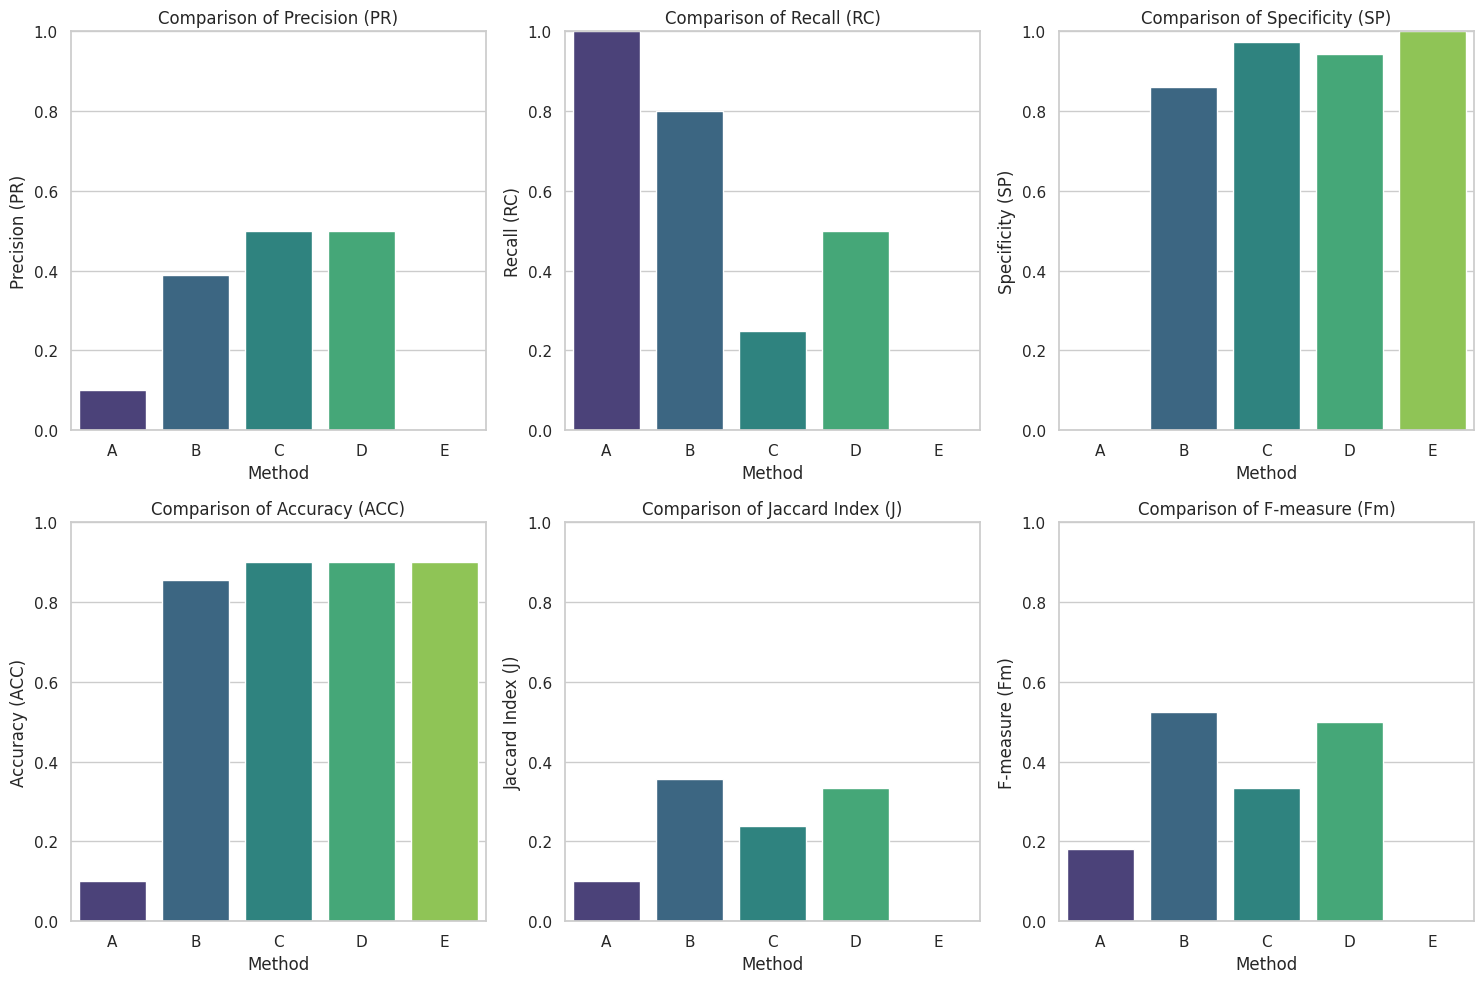

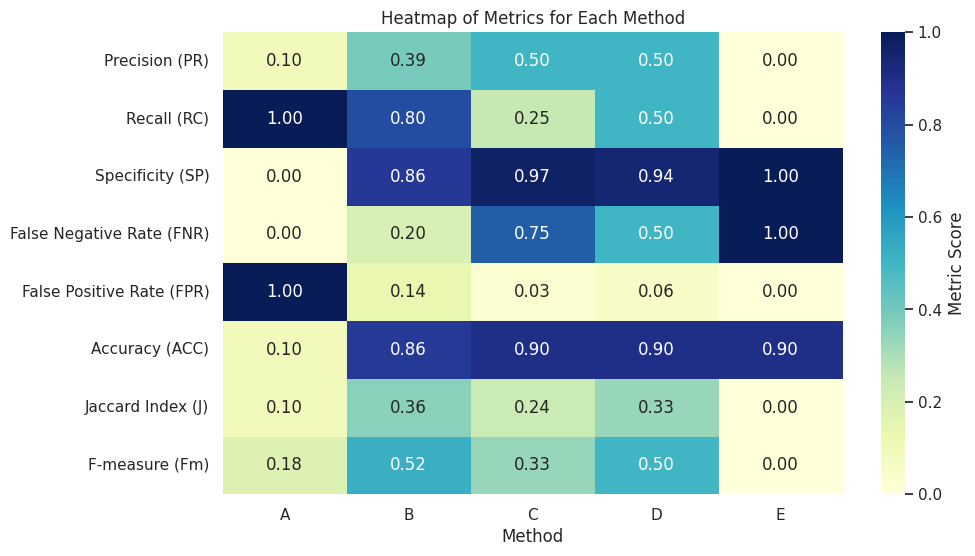

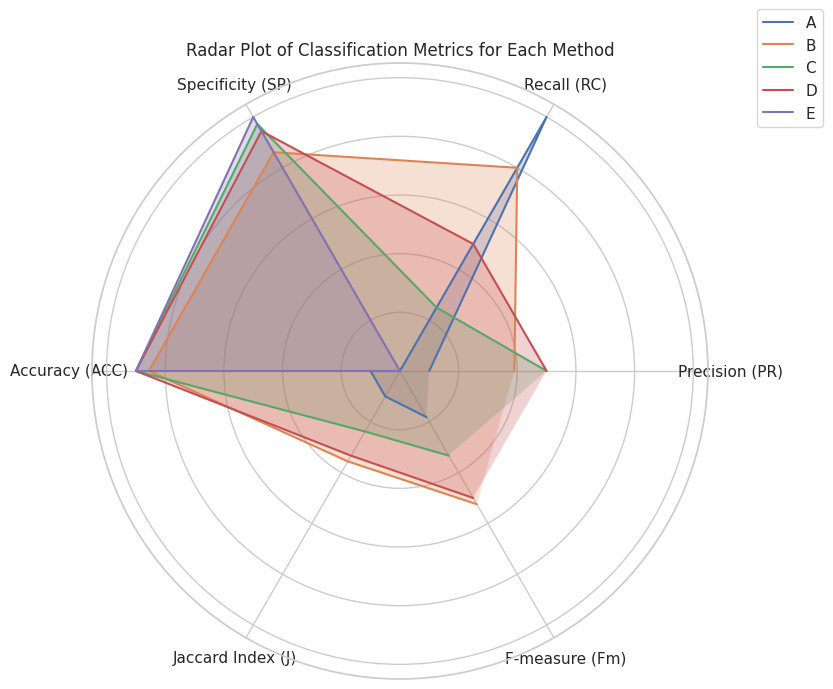

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Definir los datos
data = {
    'Method': ['A', 'B', 'C', 'D', 'E'],
    'Precision (PR)': [0.1, 0.39, 0.5, 0.5, 0],
    'Recall (RC)': [1, 0.8, 0.25, 0.5, 0],
    'Specificity (SP)': [0, 0.8611, 0.9722, 0.9444, 1],
    'False Negative Rate (FNR)': [0, 0.2, 0.75, 0.5, 1],
    'False Positive Rate (FPR)': [1, 0.1389, 0.0278, 0.0556, 0],
    'Accuracy (ACC)': [0.1, 0.8556, 0.9, 0.9, 0.9],
    'Jaccard Index (J)': [0.1, 0.3556, 0.2381, 0.3333, 0],
    'F-measure (Fm)': [0.1818, 0.5246, 0.3333, 0.5, 0]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Establecer estilo y tamaño
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Gráfico de barras para cada métrica
metrics = ['Precision (PR)', 'Recall (RC)', 'Specificity (SP)', 'Accuracy (ACC)', 'Jaccard Index (J)', 'F-measure (Fm)']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Method', y=metric, data=df, palette="viridis")
    plt.title(f'Comparison of {metric}')
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Heatmap para visualizar puntuaciones
plt.figure(figsize=(10, 6))
heatmap_data = df.set_index('Method').T  # Transpose to have methods as columns
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Metric Score'})
plt.title('Heatmap of Metrics for Each Method')
plt.show()

# Radar plot (Spider Plot)
import numpy as np

# Prepare data for radar plot
labels = metrics
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each method
for index, row in df.iterrows():
    values = row[metrics].values.flatten().tolist()
    ax.plot(angles, values, label=row['Method'])
    ax.fill(angles, values, alpha=0.25)

# Add labels and title
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels)
plt.title('Radar Plot of Classification Metrics for Each Method')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


In [14]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 36.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 44.4 MB/s eta 0:00:0000:0100:01


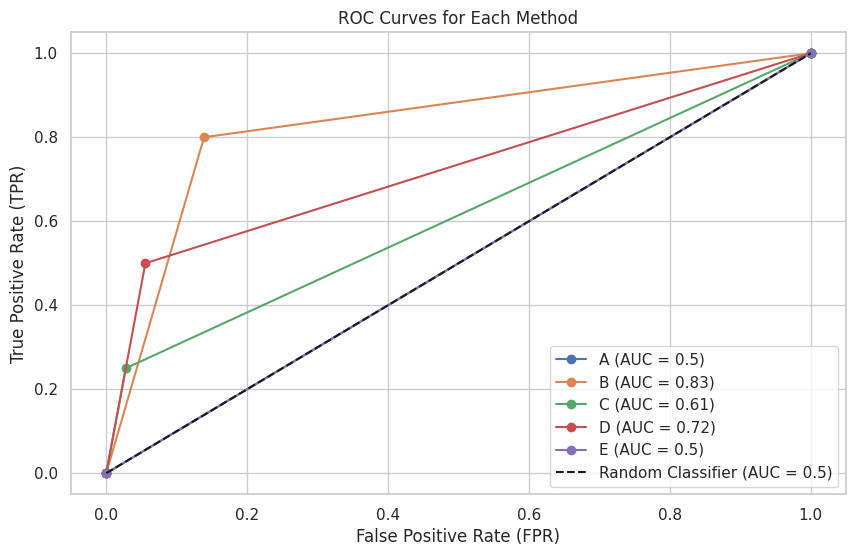

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Crear datos de TP, FP, TN, FN para simular valores de probabilidad de predicción
data = {
    'Method': ['A', 'B', 'C', 'D', 'E'],
    'TP': [100, 80, 25, 50, 0],
    'FP': [900, 125, 25, 50, 0],
    'FN': [0, 20, 75, 50, 100],
    'TN': [0, 775, 875, 850, 900]
}

# Función para calcular valores de FPR y TPR
def calculate_fpr_tpr(tp, fp, fn, tn):
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0  # True Positive Rate (Sensitivity)
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0  # False Positive Rate
    return fpr, tpr

# Calcular FPR, TPR para cada método
fpr_values = []
tpr_values = []
for i in range(len(data['Method'])):
    fpr, tpr = calculate_fpr_tpr(data['TP'][i], data['FP'][i], data['FN'][i], data['TN'][i])
    fpr_values.append(fpr)
    tpr_values.append(tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
for i, method in enumerate(data['Method']):
    plt.plot([0, fpr_values[i], 1], [0, tpr_values[i], 1], marker='o', label=f'{method} (AUC = {round(auc([0, fpr_values[i], 1], [0, tpr_values[i], 1]), 2)})')
    
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Each Method')
plt.legend(loc='lower right')
plt.show()


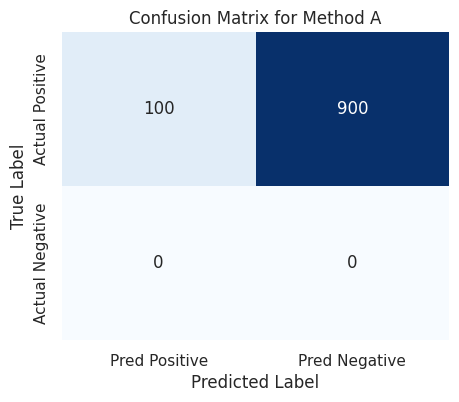

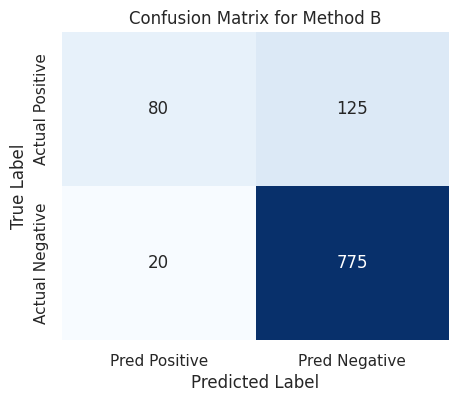

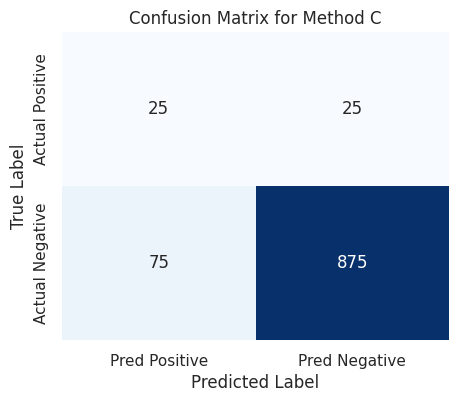

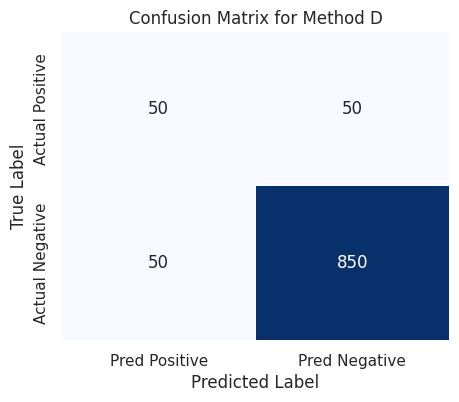

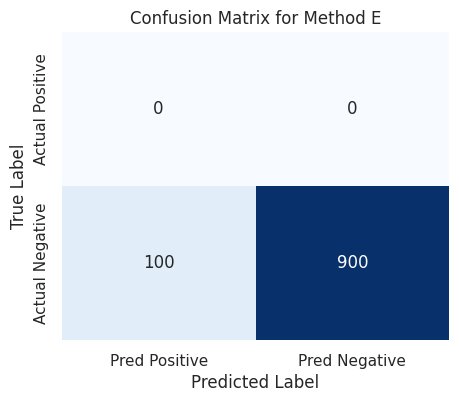

In [16]:
import seaborn as sns
import pandas as pd


df = pd.DataFrame(data)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(df):
    for i, row in df.iterrows():
        cm = np.array([[row['TP'], row['FP']], [row['FN'], row['TN']]])
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Pred Positive', 'Pred Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
        plt.title(f'Confusion Matrix for Method {row["Method"]}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

plot_confusion_matrix(df)


In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Simulación de datos binarios para 1000 muestras (desbalanceado)
np.random.seed(42)
y_true = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])
y_pred_method_a = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])  # Ejemplo de método A

# Función de validación cruzada
def cross_validation_metrics(y_true, y_pred, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    precision_scores, recall_scores, accuracy_scores, f1_scores = [], [], [], []
    
    for train_index, test_index in kf.split(y_true):
        y_true_fold, y_pred_fold = y_true[test_index], y_pred[test_index]
        
        # Calcular métricas
        precision_scores.append(precision_score(y_true_fold, y_pred_fold, zero_division=0))
        recall_scores.append(recall_score(y_true_fold, y_pred_fold, zero_division=0))
        accuracy_scores.append(accuracy_score(y_true_fold, y_pred_fold))
        f1_scores.append(f1_score(y_true_fold, y_pred_fold, zero_division=0))
    
    print("Average Precision:", np.mean(precision_scores))
    print("Average Recall:", np.mean(recall_scores))
    print("Average Accuracy:", np.mean(accuracy_scores))
    print("Average F1 Score:", np.mean(f1_scores))
    print("\nVariance in Precision:", np.var(precision_scores))
    print("Variance in Recall:", np.var(recall_scores))
    print("Variance in Accuracy:", np.var(accuracy_scores))
    print("Variance in F1 Score:", np.var(f1_scores))

cross_validation_metrics(y_true, y_pred_method_a)


Average Precision: 0.09150849150849151
Average Recall: 0.0837056277056277
Average Accuracy: 0.8230000000000001
Average F1 Score: 0.0864265085879313

Variance in Precision: 0.010618093195515774
Variance in Recall: 0.01077977519161935
Variance in Accuracy: 0.00038599999999999946
Variance in F1 Score: 0.0105033872116924
